# Regresión Lineal Costo de un Incidente de Seguridad 

En este ejercicio se explican los fundamentos de la regresion lineal aplicada a un caso sencillo relacionando con la CyberSeguridad.

### Enunciado del Ejercicio 

EL ejercicio consiste en predecir el csoto de un incidente de seguridad en base a número de equipos afectados. El conjunto de datos es generado de manera aleatoria. 


## 1.-Generación del DataSet

In [2]:
import numpy as np 


X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X +np.random.randn(100, 1)

print("La Longitud del DataSet es: ",len(X))

La Longitud del DataSet es:  100


## 2.- Visualización del DataSet 

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inLine

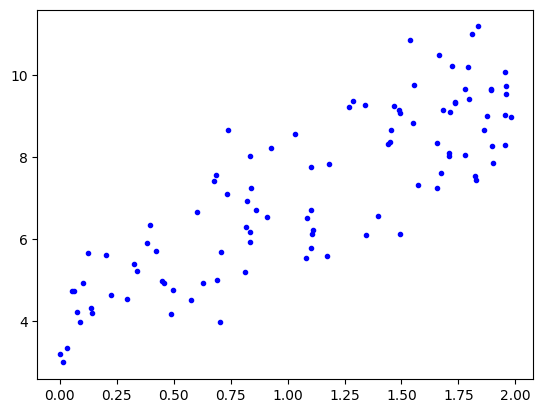

In [4]:
plt.plot(X,y, "b.")
plt.show()

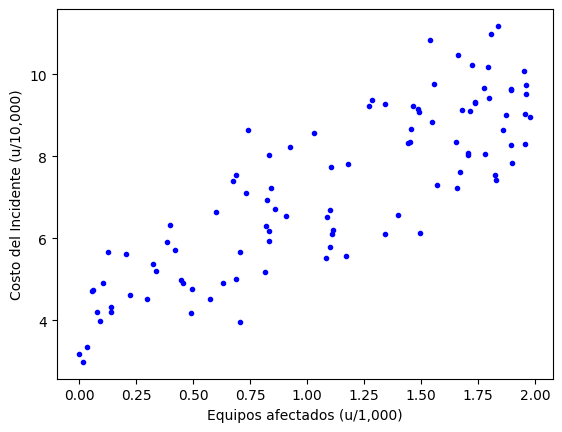

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1,000)")
plt.ylabel("Costo del Incidente (u/10,000)")
plt.show()

### 3.- Modificación del DataSet

In [6]:
import pandas as pd

data = {'No_Equipos_Afectados': X.flatten(), 'Costo': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,0.384653,5.905047
1,0.908188,6.535226
2,1.081661,5.524783
3,1.108100,6.116030
4,0.686730,7.555781
5,0.447489,4.981312
6,1.722788,10.219136
7,0.840264,7.236762
8,0.832904,5.930432
9,1.827100,7.427259


In [7]:
# Escalando el número de Equipos Afectados
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 1000
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'].astype(int)

# Escalado del costo 
df['Costo'] = df['Costo'] * 10000
df['Costo'] = df['Costo'].astype(int)

df.head(10)

,No_Equipos_Afectados,Costo
0,384,59050
1,908,65352
2,1081,55247
3,1108,61160
4,686,75557
5,447,49813
6,1722,102191
7,840,72367
8,832,59304
9,1827,74272


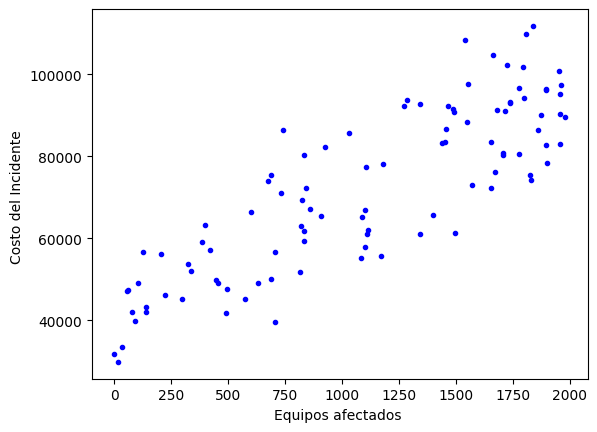

In [8]:
# Representacion grafica del DataSet
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos afectados ")
plt.ylabel("Costo del Incidente ")
plt.show()

## 4.- Construcción del Modelo

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# Construcción del Modelo y ajuste de la función de Hipótesis 
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos_Afectados'].values.reshape(-1, 1), df['Costo'].values)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
# Obetencion Theta 0

lin_reg.intercept_

np.float64(41532.38333934406)

In [12]:
# Parametro Theta 1
lin_reg.coef_

array([27.46738506])

In [42]:
# Prediccion para el valor mínimo y máximo del DataSet de entrenamiento
x_min_max = np.array([[df['No_Equipos_Afectados'].min()],[df['No_Equipos_Afectados'].max()]])
y_train_pred = lin_reg.predict(x_min_max)

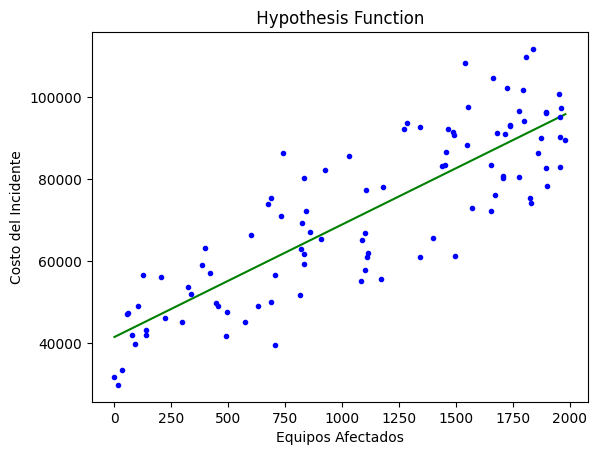

In [44]:
# Representacion gráfica de la función de Hipótesis generada
# Datos de la gráfica
plt.title(" Hypothesis Function ")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")

# Gráficacion de los datos y función 
plt.plot(x_min_max, y_train_pred, 'g-' )
plt.plot(df['No_Equipos_Afectados'],df['Costo'], 'b.')
plt.show()

## 5.- Predicción de nuevos ejemplos

In [51]:
x_new = np.array([[3000]]) #1500 EQUIPOS AFECTADOS

# Prediccioón del costo que tendria el indidente 
costo = lin_reg.predict(x_new)
print("El costo del incidente seria: $", int(costo[0]))

El costo del incidente seria: $ 123934


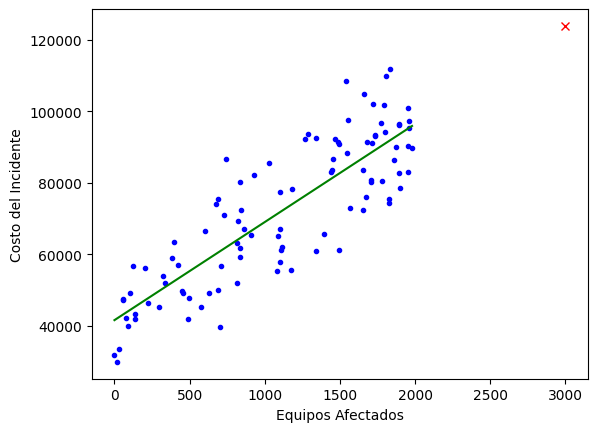

In [52]:
plt.plot(df['No_Equipos_Afectados'],df['Costo'], 'b.')
plt.plot(x_min_max, y_train_pred, 'g-' )
plt.plot(x_new, costo, "rx")

plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()